In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [2]:
df=df[["Open","High","Low","Close"]]
df

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [3]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
df=scaler.fit_transform(df)

df

array([[0.        , 0.23515054, 0.2312812 , 0.22213181],
       [0.        , 0.23189585, 0.22795341, 0.21887713],
       [0.        , 0.23515054, 0.2312812 , 0.22213181],
       ...,
       [0.16304348, 0.1179821 , 0.11680534, 0.11017088],
       [0.15289854, 0.10886899, 0.11547421, 0.10886899],
       [0.15289854, 0.11147275, 0.11547421, 0.11147275]])

In [5]:
# 테스트 분리
test_size=200
df_train=df[:-test_size]
df_test=df[-test_size:]
df_train.shape, df_test.shape

((9898, 4), (200, 4))

In [6]:
#스클릿 시퀀스
import numpy as np

def split_sequence(sequence, n_steps):

    x, y = [], []

    for i in range(len(sequence) - n_steps):

        # 입력 시퀀스와 다음 값 분리

        seq_x = sequence[i:i + n_steps]

        seq_y = sequence[i + n_steps]

        x.append(seq_x)

        y.append(seq_y)

    return np.array(x), np.array(y)

x_train, y_train = split_sequence(df_train, 5)
x_train.shape, y_train.shape

((9893, 5, 4), (9893, 4))

In [7]:
# LSTM 구축
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model=Sequential()
model.add(LSTM(16,
               input_shape=(x_train.shape[1], 4),
               activation='tanh',
               return_sequences=False)
         )

model.add(Dense(4))

model.summary()

C:\Users\김찬희\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 16)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,412 (5.52 KB)

 Trainable params: 1,412 (5.52 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델 학습

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs=30, batch_size=16)

Epoch 1/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0080
Epoch 2/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.8270e-04
Epoch 3/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.7062e-04
Epoch 4/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.8025e-04
Epoch 5/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.2221e-04
Epoch 6/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.5951e-04
Epoch 7/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.5940e-04
Epoch 8/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.3661e-04
Epoch 9/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.9009e-04
Epoch 10/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 8.9808e-04
Epoch 11/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.1838e-04
Epoch 12/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.6099e-04
Epoch 13/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.0901e-04
Epoch 14/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 6.5657e-04
Epoch

In [11]:
# test 셋 예측
x_test, y_test = split_sequence(df_test, 5)
pred=model.predict(x_test)
pred.shape, pred[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


((195, 4),
 array([[0.18093151, 0.13373464, 0.13772857, 0.13241278],
        [0.18210833, 0.13451593, 0.13917519, 0.13323554],
        [0.18278386, 0.13439116, 0.13944097, 0.13320889],
        [0.18359476, 0.1353979 , 0.1403986 , 0.1341882 ],
        [0.18158571, 0.13331112, 0.13844828, 0.1321302 ]], dtype=float32))

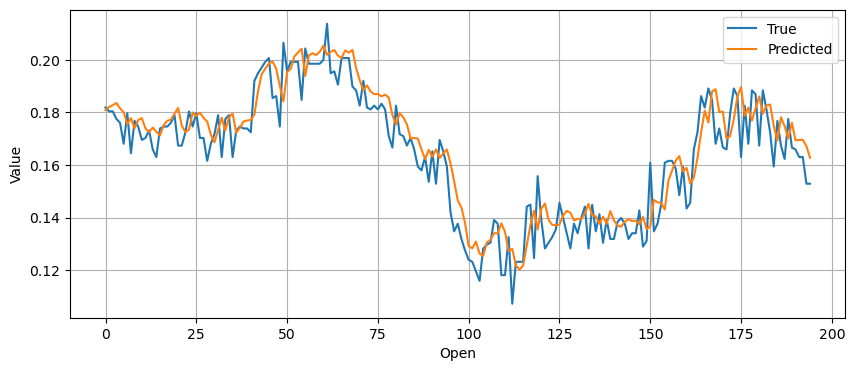

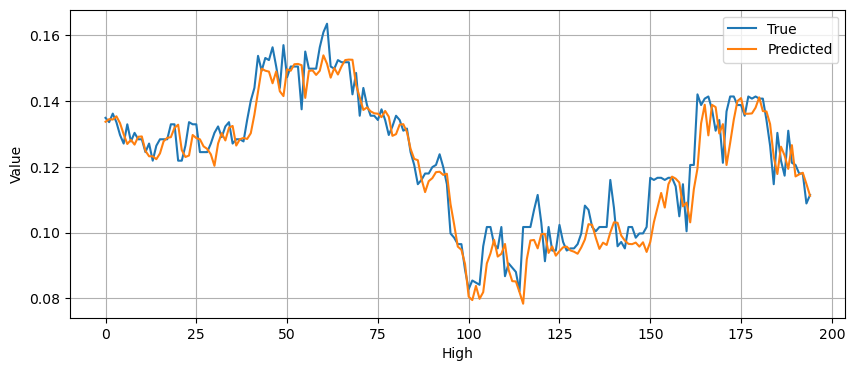

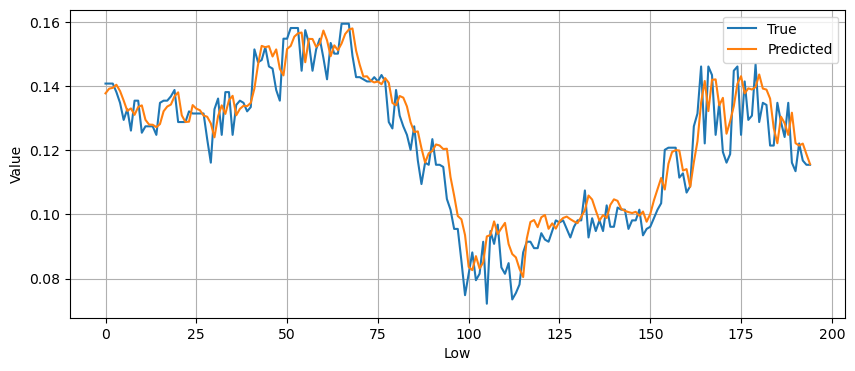

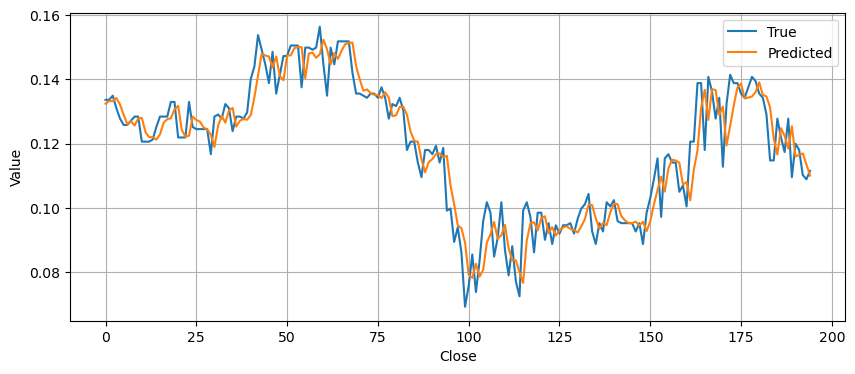

In [12]:
# 시각화
import matplotlib.pyplot as plt
feature=["Open","High","Low","Close"]

for i in range(4):
    plt.figure(figsize=(10, 4))
    plt.plot(y_test[:, i], label='True')
    plt.plot(pred[:, i], label='Predicted')
    plt.xlabel(feature[i])
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()